# In this sheet we are going to explore the AOP+ Shipping.xls - Sheet1

just a litle note , the sheet is not a real real data , i dosent have categorical columns , date time or related to custumers behavior , so i can only do some cleaning and some graph ..
1 2 3 , here we go 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={"figure.figsize" : (16,9)} , font_scale=1.7)
sns.set_palette('viridis')

## 1- data manipulation

**so here is our table , the only easy thing to do is plot a graph for each product and compare the cost for each country ,
wich you can compair them just by lokking in numbers so we must fix it .**

In [3]:
df = pd.read_csv('AOP+ Shipping.xls - Sheet1.csv')
df.head()

,Product,United States (Tracked),United Kingdom (Tracked),Europe (Tracked),Ireland (Untracked),Germany (Tracked),France (Tracked),Rest of World (Tracked),Canada (Tracked),Australia (Tracked)
0,11oz Mug,5.99,5.15,9.49,4.59,5.69,5.49,9.99,9.49,9.59
1,11oz Mug - additional item cost,5.99,1.29,1.99,1.49,0.99,0.99,2.99,1.49,1.99
2,Adult Flip Flops,7.99,5.99,11.49,5.99,6.49,7.49,12.99,10.99,10.59
3,Adult Flip Flops - additional item cost,2.59,1.49,6.19,3.49,1.99,1.99,6.99,3.59,6.69
4,Classic Adult Hooded Blanket,10.49,5.99,11.49,11.49,6.49,7.49,12.99,10.99,10.59


**first step is by make the product have the same name , and then add another columns that deliver the deleted information , which is additional item.**

In [4]:
df['Product'] = df['Product'].astype(str) + ' '

In [5]:
df['Product'].iloc[0]

'11oz Mug '

In [6]:
df['Product'].iloc[1].split('-')

['11oz Mug ', ' additional item cost ']

In [7]:
df['Type']  = df['Product'].apply(lambda x :x.split('-')[0])

In [8]:
df.head()

,Product,United States (Tracked),United Kingdom (Tracked),Europe (Tracked),Ireland (Untracked),Germany (Tracked),France (Tracked),Rest of World (Tracked),Canada (Tracked),Australia (Tracked),Type
0,11oz Mug,5.99,5.15,9.49,4.59,5.69,5.49,9.99,9.49,9.59,11oz Mug
1,11oz Mug - additional item cost,5.99,1.29,1.99,1.49,0.99,0.99,2.99,1.49,1.99,11oz Mug
2,Adult Flip Flops,7.99,5.99,11.49,5.99,6.49,7.49,12.99,10.99,10.59,Adult Flip Flops
3,Adult Flip Flops - additional item cost,2.59,1.49,6.19,3.49,1.99,1.99,6.99,3.59,6.69,Adult Flip Flops
4,Classic Adult Hooded Blanket,10.49,5.99,11.49,11.49,6.49,7.49,12.99,10.99,10.59,Classic Adult Hooded Blanket


In [9]:
def additional(p):
    if 'additional' in p.split():
        return True
    else:
        return False

In [10]:
df['additional'] = df['Product'].apply(lambda x: additional(x) )

In [11]:
df.head()

,Product,United States (Tracked),United Kingdom (Tracked),Europe (Tracked),Ireland (Untracked),Germany (Tracked),France (Tracked),Rest of World (Tracked),Canada (Tracked),Australia (Tracked),Type,additional
0,11oz Mug,5.99,5.15,9.49,4.59,5.69,5.49,9.99,9.49,9.59,11oz Mug,False
1,11oz Mug - additional item cost,5.99,1.29,1.99,1.49,0.99,0.99,2.99,1.49,1.99,11oz Mug,True
2,Adult Flip Flops,7.99,5.99,11.49,5.99,6.49,7.49,12.99,10.99,10.59,Adult Flip Flops,False
3,Adult Flip Flops - additional item cost,2.59,1.49,6.19,3.49,1.99,1.99,6.99,3.59,6.69,Adult Flip Flops,True
4,Classic Adult Hooded Blanket,10.49,5.99,11.49,11.49,6.49,7.49,12.99,10.99,10.59,Classic Adult Hooded Blanket,False


In [12]:
df['additional'] = df['additional'].replace([ False , True] , ['No' , 'Yes'])
df.head()

,Product,United States (Tracked),United Kingdom (Tracked),Europe (Tracked),Ireland (Untracked),Germany (Tracked),France (Tracked),Rest of World (Tracked),Canada (Tracked),Australia (Tracked),Type,additional
0,11oz Mug,5.99,5.15,9.49,4.59,5.69,5.49,9.99,9.49,9.59,11oz Mug,No
1,11oz Mug - additional item cost,5.99,1.29,1.99,1.49,0.99,0.99,2.99,1.49,1.99,11oz Mug,Yes
2,Adult Flip Flops,7.99,5.99,11.49,5.99,6.49,7.49,12.99,10.99,10.59,Adult Flip Flops,No
3,Adult Flip Flops - additional item cost,2.59,1.49,6.19,3.49,1.99,1.99,6.99,3.59,6.69,Adult Flip Flops,Yes
4,Classic Adult Hooded Blanket,10.49,5.99,11.49,11.49,6.49,7.49,12.99,10.99,10.59,Classic Adult Hooded Blanket,No


**And now here we have it , we add 2 columns "Type" and "additional" , for example the first row shows the cost of shiping of '11oz Mug' with no additional items  , and the second rown show the cost of shiping of the exact '11oz Mug' with additional items**

**This is not even the final form**

In [13]:
df = df.drop(columns='Product' , axis=1)
df.head()

,United States (Tracked),United Kingdom (Tracked),Europe (Tracked),Ireland (Untracked),Germany (Tracked),France (Tracked),Rest of World (Tracked),Canada (Tracked),Australia (Tracked),Type,additional
0,5.99,5.15,9.49,4.59,5.69,5.49,9.99,9.49,9.59,11oz Mug,No
1,5.99,1.29,1.99,1.49,0.99,0.99,2.99,1.49,1.99,11oz Mug,Yes
2,7.99,5.99,11.49,5.99,6.49,7.49,12.99,10.99,10.59,Adult Flip Flops,No
3,2.59,1.49,6.19,3.49,1.99,1.99,6.99,3.59,6.69,Adult Flip Flops,Yes
4,10.49,5.99,11.49,11.49,6.49,7.49,12.99,10.99,10.59,Classic Adult Hooded Blanket,No


In [14]:
df2 = pd.melt(df, id_vars =['Type','additional'], value_vars =['United States (Tracked)', 'United Kingdom (Tracked)',
       'Europe (Tracked)', 'Ireland (Untracked)', 'Germany (Tracked)',
       'France (Tracked)', 'Rest of World (Tracked)', 'Canada (Tracked)',
       'Australia (Tracked)'] ,var_name ='country shipping', value_name ='cost') 


**This is**
**dont worry , the dataframe only shows the first 20 element , in thhis table there is  1188 rows , and for the columns there is Type or prety much ID , 2 categorical columns "additional" and "country shipping" and one colums of value cost**

In [15]:
df2.head(20)

,Type,additional,country shipping,cost
0,11oz Mug,No,United States (Tracked),5.99
1,11oz Mug,Yes,United States (Tracked),5.99
2,Adult Flip Flops,No,United States (Tracked),7.99
3,Adult Flip Flops,Yes,United States (Tracked),2.59
4,Classic Adult Hooded Blanket,No,United States (Tracked),10.49
5,Classic Adult Hooded Blanket,Yes,United States (Tracked),5.49
6,Classic Adult Hoodie,No,United States (Tracked),7.99
7,Classic Adult Hoodie,Yes,United States (Tracked),2.59
8,Classic Adult Muscle Top,No,United States (Tracked),4.99
9,Classic Adult Muscle Top,Yes,United States (Tracked),1.49


**Some statistical information about data and cost columns**

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 4 columns):
Type                1188 non-null object
additional          1188 non-null object
country shipping    1188 non-null object
cost                1188 non-null float64
dtypes: float64(1), object(3)
memory usage: 37.2+ KB


In [17]:
df2.describe()

,cost
count,1188.000000
mean,5.145025
std,3.524084
min,0.000000
25%,1.990000
50%,4.590000
75%,7.990000
max,12.990000


## 2- plot 
**now now don't get mad at me , the data have nothing but cost of shipping pretty much no relationship between product , but we can spot some behaviors**

**this first plot jave 2 columns in it , one represent the cost of shiping with no additional data , and other with additional data.**

**for non aditional columns we can stop the huge change in cost of shiping for "Premium Sublimation Adult Blanket" and "Premium Adult Hooded Blanket" to the US , it jumt instant from avrege of 7 to around 13 maybe ..**

**The plot is chunky , but it contain 1000 row of information , but still you can see some interesting pricing changes .** 

**I ll let you enjoy it x)** 

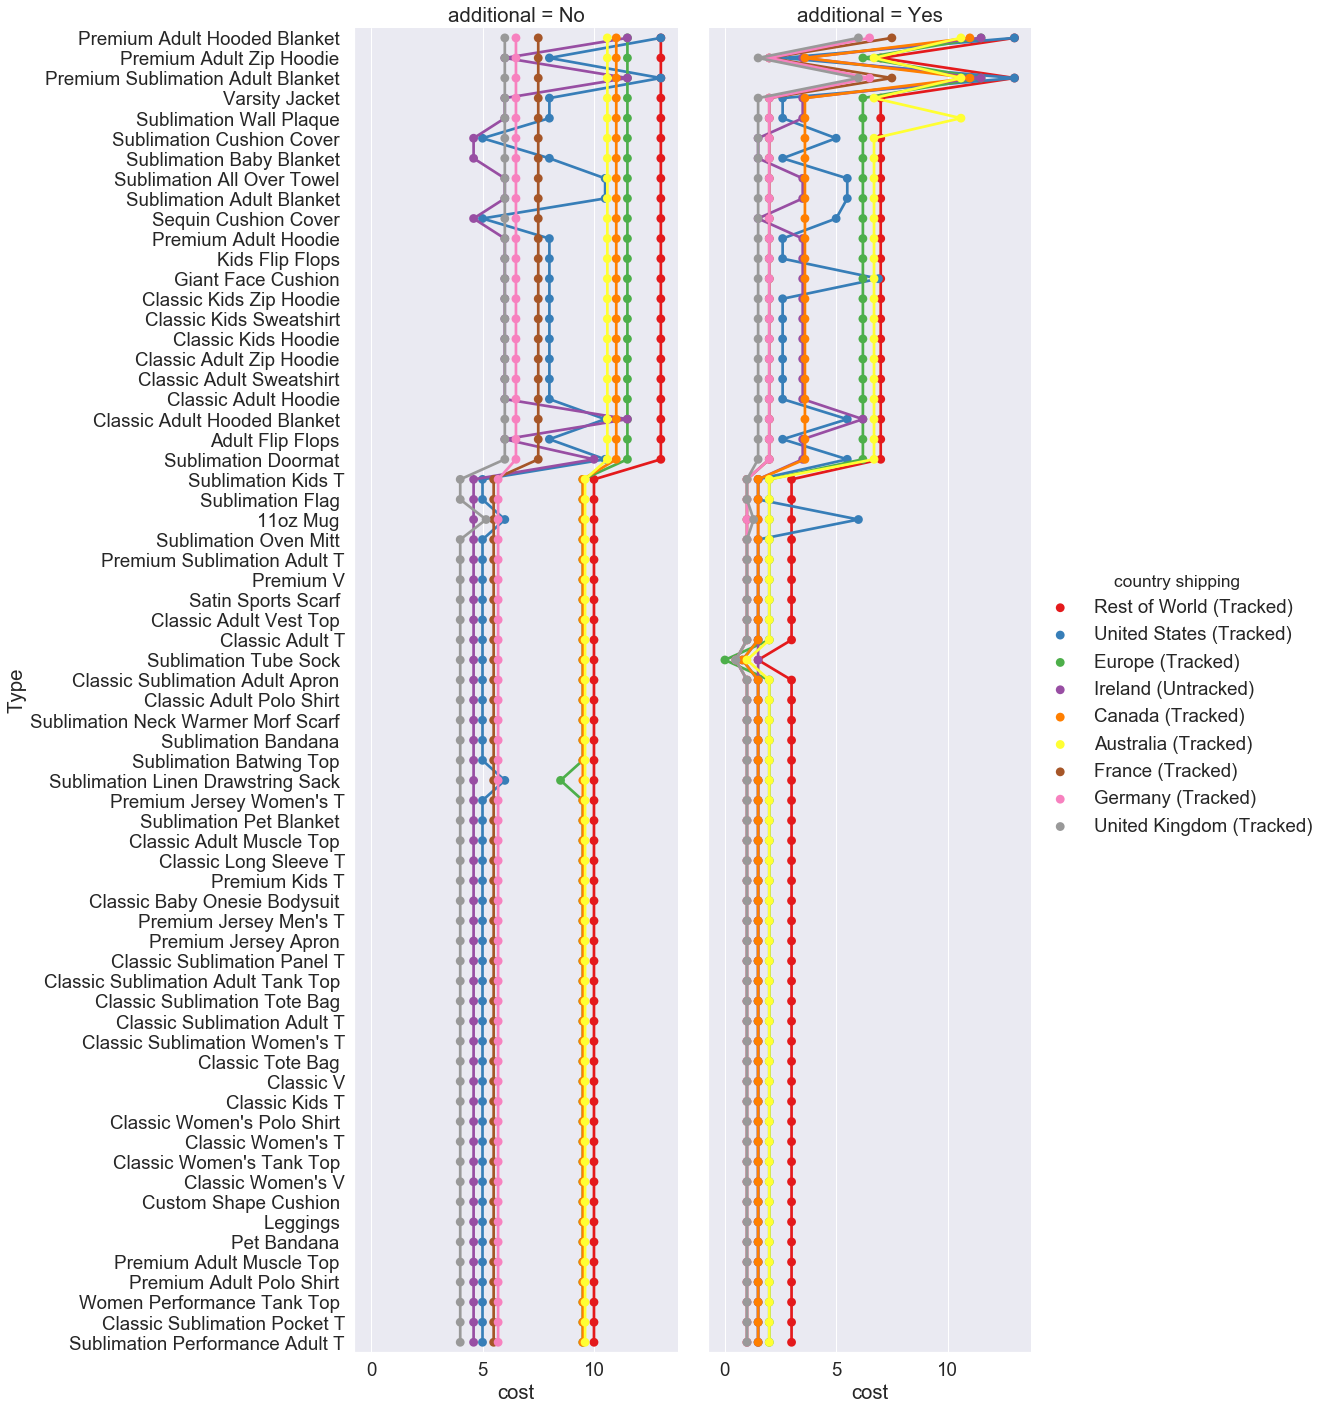

In [18]:
sns.catplot(data=df2.sort_values("cost" , ascending=False ) , x='cost' , y='Type' , col='additional' , kind='point' , hue='country shipping' ,
            join=True ,height=20 , aspect=0.4, palette='Set1',  )

**Next we have distribution plot of the cost of shipping for each country , so that you can see how much the cost interval of shipped product with additional items is distrubuted and interfiring with some product prices with no additional items**

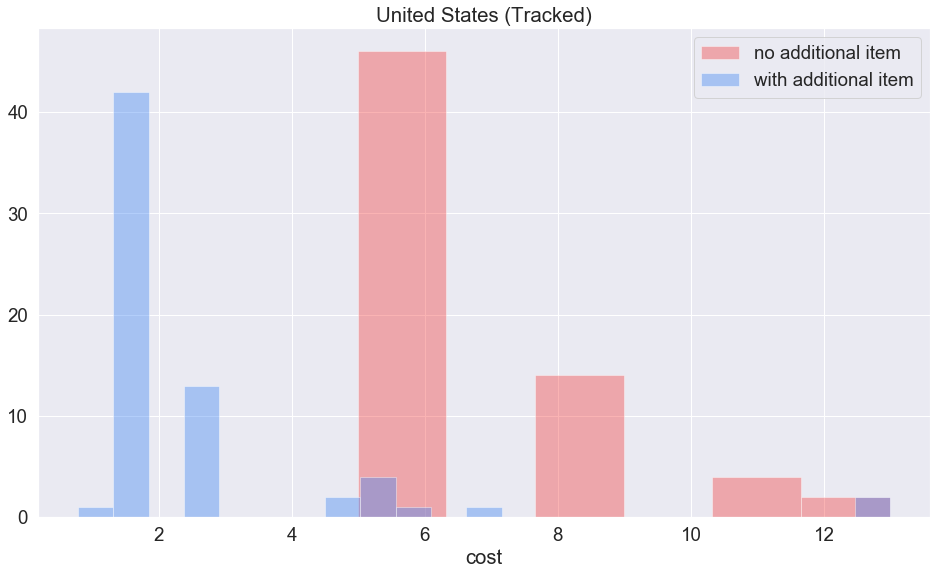

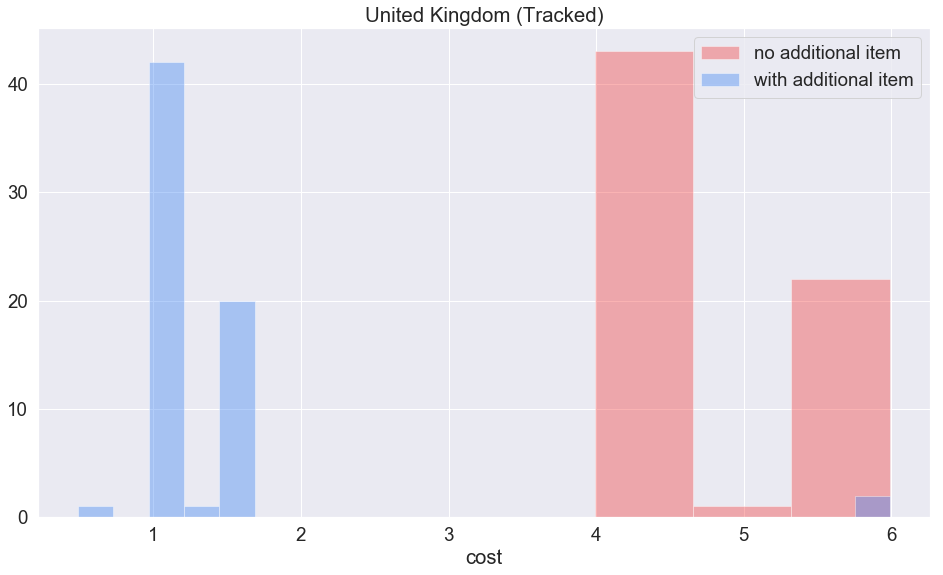

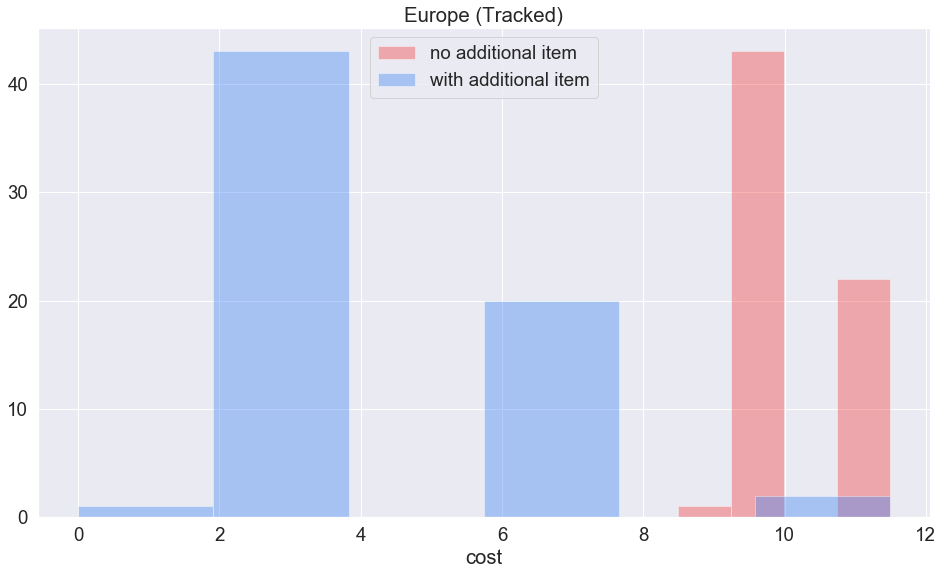

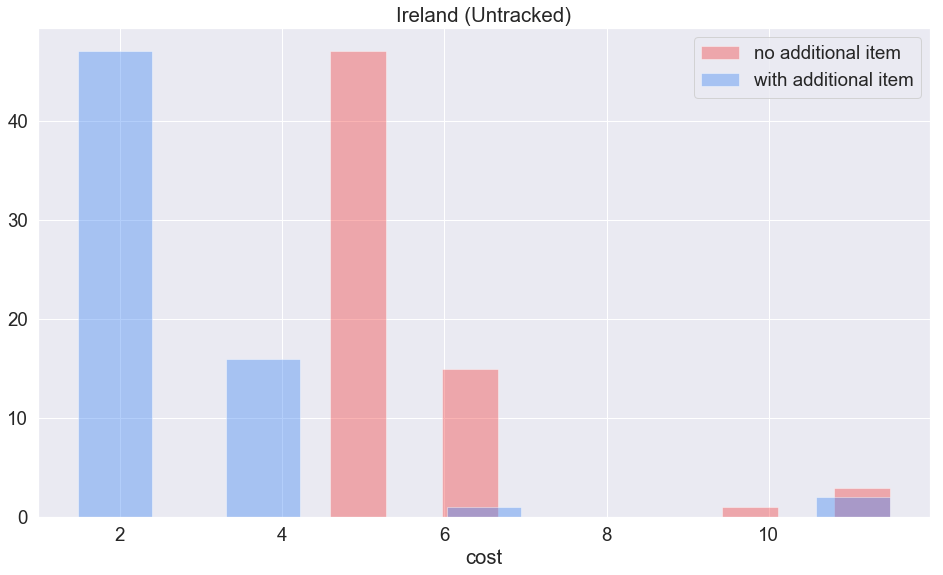

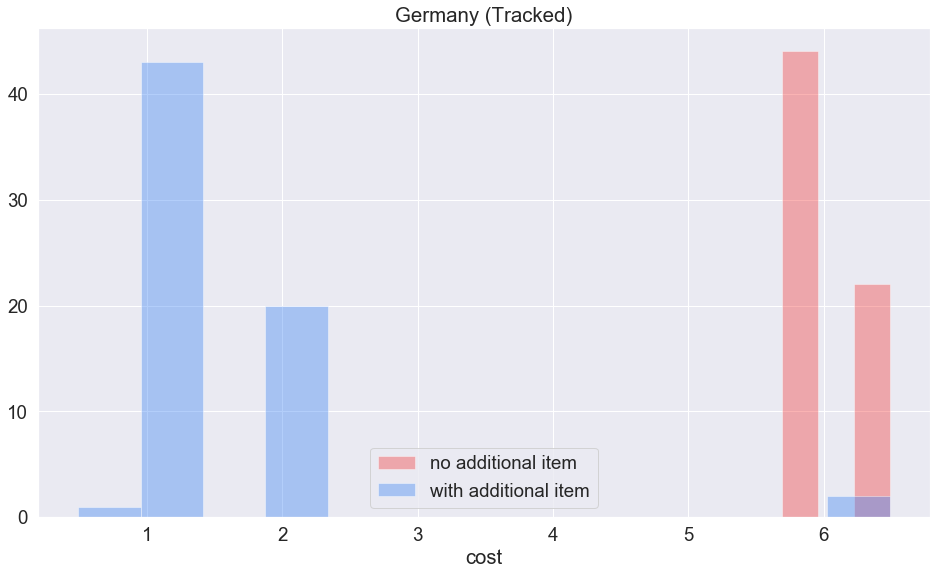

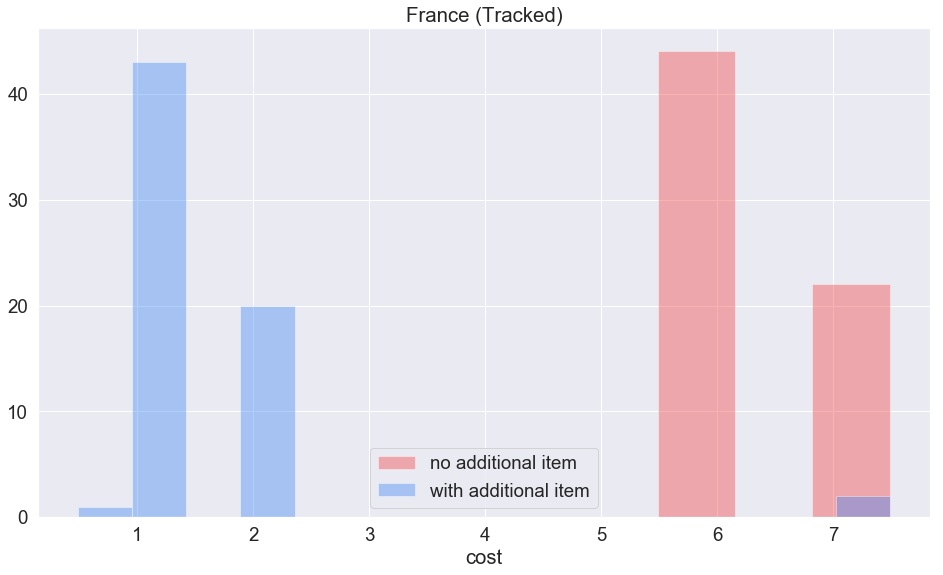

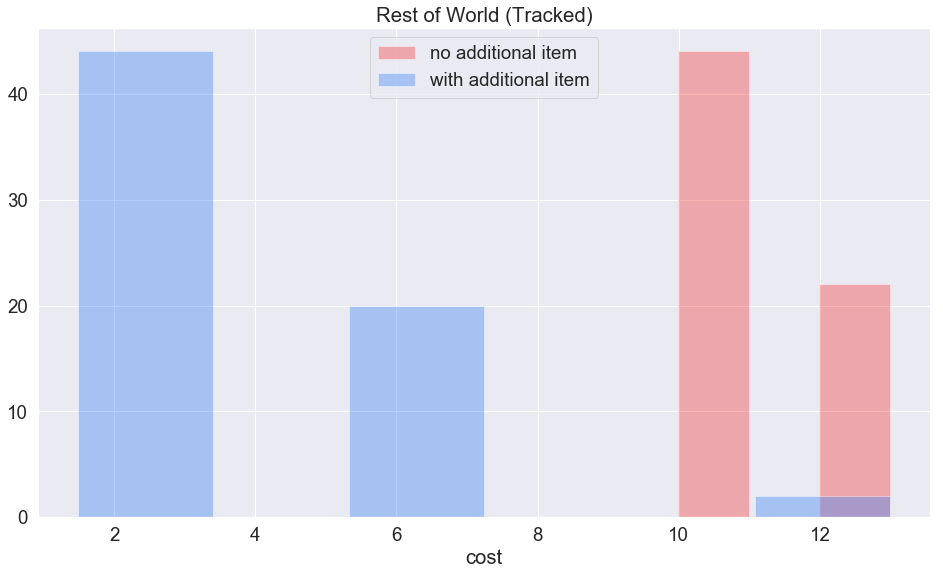

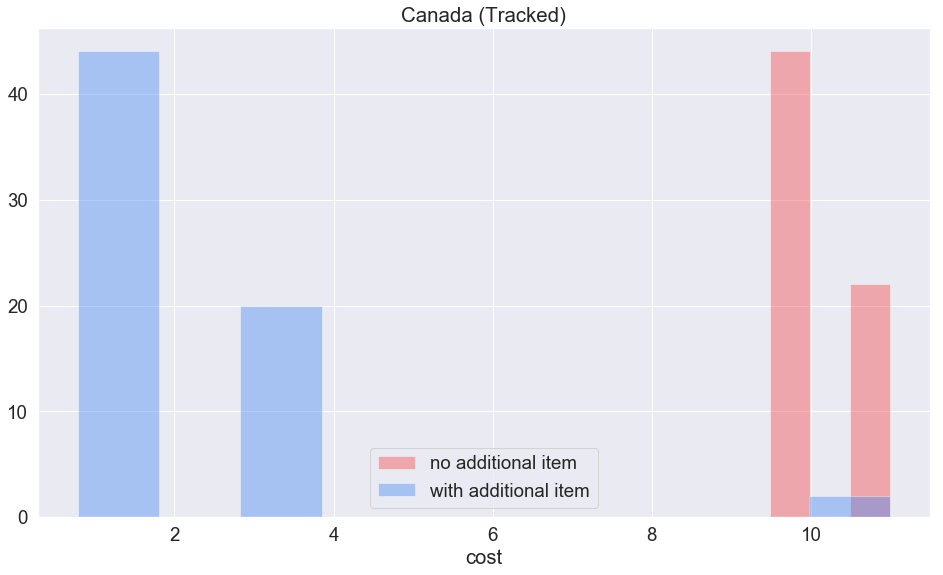

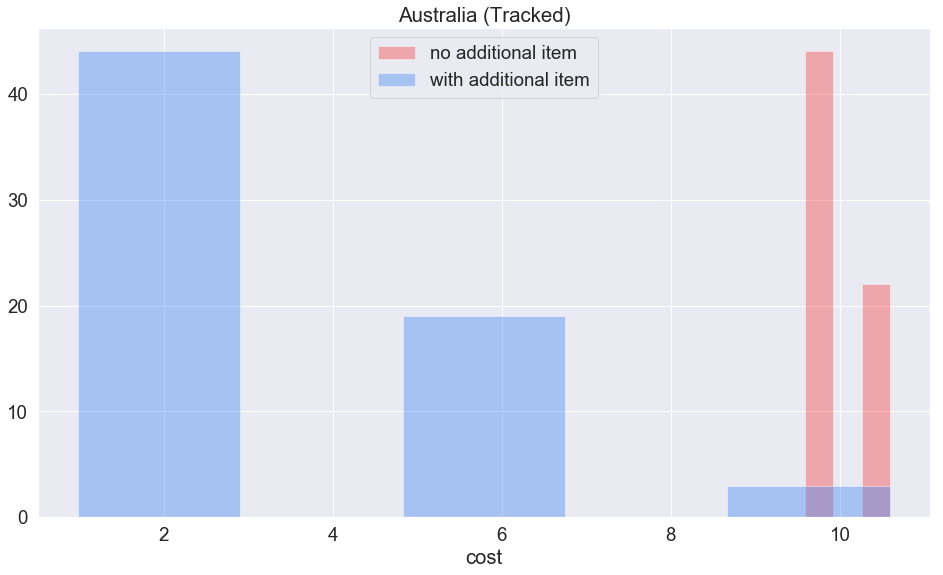

In [19]:
f= ['United States (Tracked)', 'United Kingdom (Tracked)',
       'Europe (Tracked)', 'Ireland (Untracked)', 'Germany (Tracked)',
       'France (Tracked)', 'Rest of World (Tracked)', 'Canada (Tracked)',
       'Australia (Tracked)']
for i in f:
    sns.distplot(df2[(df2['country shipping']==i) & (df2['additional']=='No')]['cost'] , color='#f44141' , kde=False , label="no additional item")
    sns.distplot(df2[(df2['country shipping']==i) & (df2['additional']=='Yes')]['cost'] , color='#4286f4' , kde=False  , label="with additional item")
    plt.legend()
    plt.title(i)
    plt.show()
    print(' ')

**and this is boxplot , it contain some additional statistic information , really important for us 
so the way you can read it , the colored box represent 50 % of all data , on top of the box and the bottom there is some T shape object , those are .. emm there are consider the normal maximum and the minimum , we do that to focut on some things called outliers , those values are important because they are unfamiliar in the data set.**

**it's like Human height , the tallest human had 2.72 m , but we cant consider this a maximum because is not commun and it a special case that need focus**

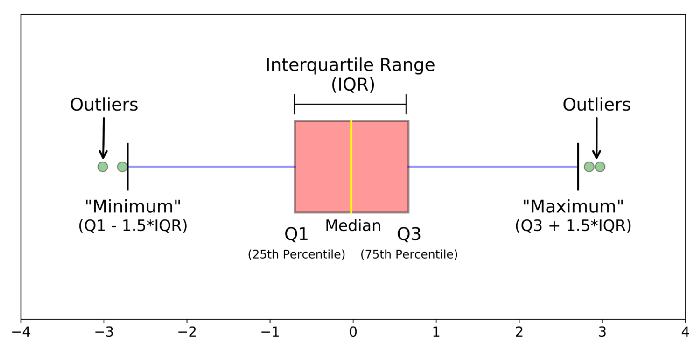

In [20]:
from IPython.core.display import Image, display
display(Image('1_2c21SkzJMf3frPXPAR_gZA.png'))


**in the first example we have no additional items in RED and with additional item i BLue.**
**the avrege cost for no additinal items is 5 to 8 , with one normal maximum of 10.5 and an outlier of almost 13 .**
**the avrege cost for  additinal items is 1.8 to 2.8 , with one normal minimum of less than 1 but with overliers that equal almost the cost of normal product cost , and even bigger outlier that is almost eqaul the last one.**

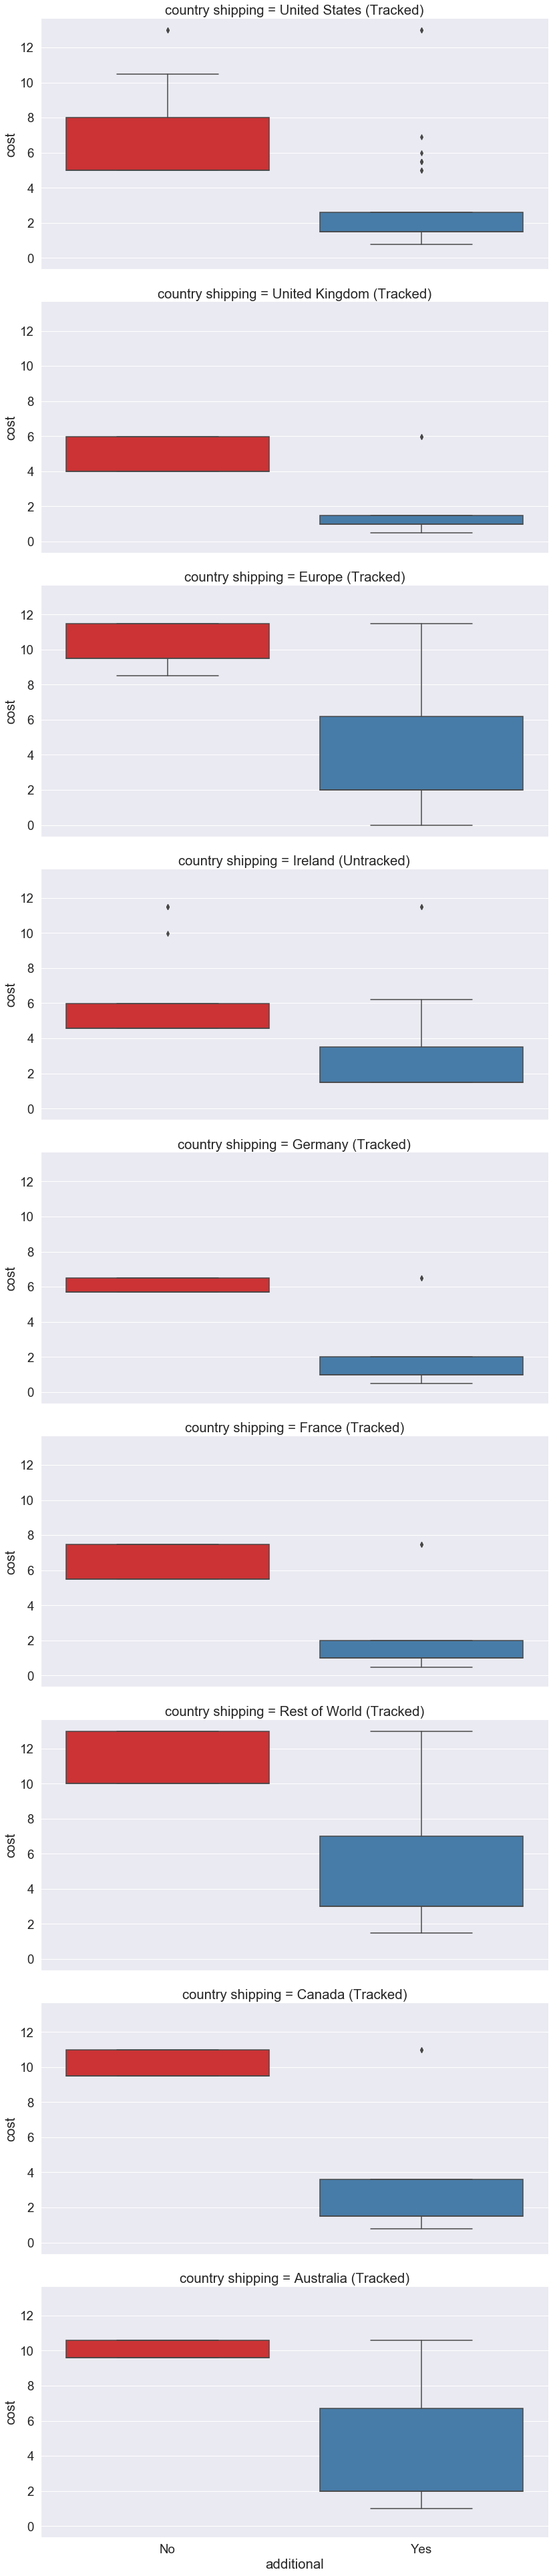

In [21]:
sns.catplot(data=df2 , x='additional' , y='cost' , row='country shipping' , kind='box'  ,
             height=6 , aspect=2, palette='Set1',  )

**i toke extra 2 hour to find out how to make an interactive plot that iknow you will like , but they made some huge update and i cant figure out why am getting some error**

**I Hope you enjoy it even tho it not  a good example of what i can do ^^**

**The Milk Man**